# 1. Install Dependencies and Setup

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


pre = Precision()
re = Recall()
acc = BinaryAccuracy()



In [3]:
data_dir = '../P4/train'

In [4]:
birds = sorted(os.listdir(data_dir))
print(birds)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

# 3. Load Data

In [5]:
#########
data = tf.keras.utils.image_dataset_from_directory('../P4/train', label_mode='categorical', labels='inferred')



Found 18748 files belonging to 118 classes.


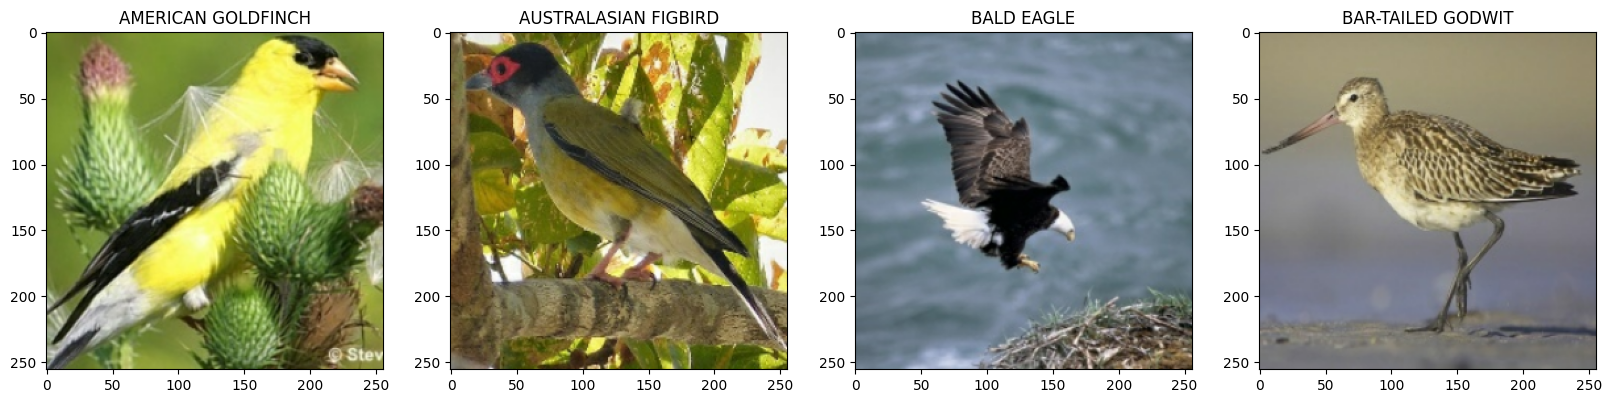

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Get the class names
class_names = data.class_names

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(np.uint8))
    # Find the index of the maximum value in the one-hot encoded label
    label_idx = np.argmax(batch[1][idx])
    # Get the class name corresponding to the label index
    class_name = class_names[label_idx]
    ax[idx].set_title(class_name)  # Set the title with the class name
plt.show()


# 4. Scale Data

In [7]:
scaled_data = data.map(lambda x,y: (x/255, y))




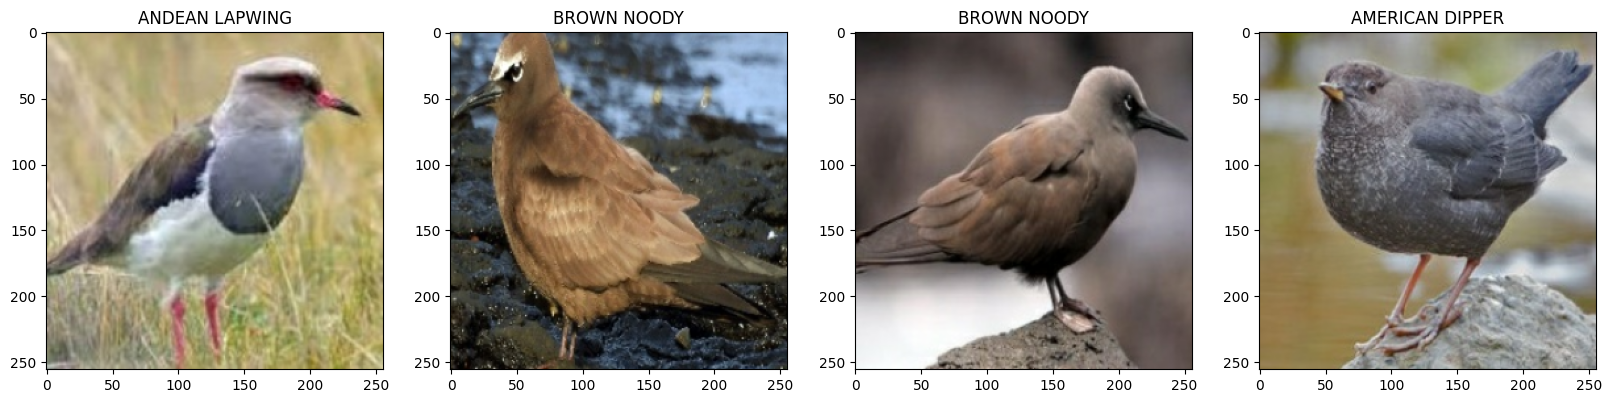

In [8]:
data_iterator = scaled_data.as_numpy_iterator()
batch = data_iterator.next()

# Get the class names
class_names = data.class_names

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    # Find the index of the maximum value in the one-hot encoded label
    label_idx = np.argmax(batch[1][idx])
    # Get the class name corresponding to the label index
    class_name = class_names[label_idx]
    ax[idx].set_title(class_name)  # Set the title with the class name
plt.show()

In [11]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1)+1

print(train_size+val_size+test_size)
len(scaled_data)

586


586

In [12]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [13]:

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout before the output layer
model.add(Dense(len(birds), activation='softmax'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 118)            │        30,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,726,694 (14.22 MB)

 Trainable params: 3,726,694 (14.22 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [15]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# Apply data augmentation to the training dataset
train = train.map(lambda x, y: (data_augmentation(x), y))


In [16]:
logdir='/content/drive/MyDrive/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=100, validation_data=val)


Epoch 1/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 288s 700ms/step - accuracy: 0.4303 - loss: 2.1768 - val_accuracy: 0.4850 - val_loss: 2.1178
Epoch 2/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 286s 697ms/step - accuracy: 0.4327 - loss: 2.1828 - val_accuracy: 0.5118 - val_loss: 2.0121
Epoch 3/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 287s 698ms/step - accuracy: 0.4338 - loss: 2.1590 - val_accuracy: 0.5056 - val_loss: 2.0194
Epoch 4/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 283s 689ms/step - accuracy: 0.4446 - loss: 2.1358 - val_accuracy: 0.4688 - val_loss: 2.2009
Epoch 5/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 284s 691ms/step - accuracy: 0.4397 - loss: 2.1331 - val_accuracy: 0.4904 - val_loss: 2.0935
Epoch 6/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 285s 693ms/step - accuracy: 0.4355 - loss: 2.1288 - val_accuracy: 0.4685 - val_loss: 2.1864
Epoch 7/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 285s 693ms/step - accuracy: 0.4437 - loss: 2.1096 - val_accuracy: 0.5045 - val_loss: 1.9882
Epoch 8/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 283s 689ms/step - accuracy: 

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision: {pre.result()},Recall: {re.result()}, Accuracy: {acc.result()}')

# 10. Test

In [ ]:

def preprocess_image(image_path, target_size=(256, 256)):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    # Convert the image to float32 and normalize its pixel values to the range [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Expand the dimensions to create a batch of size 1
    image = np.expand_dims(image, axis=0)
    return image


In [ ]:
model.predict(preprocessed_image)[0]

In [ ]:


image_path = '../P4/test/ABBOTTS BABBLER/2.jpg'
preprocessed_image = preprocess_image(image_path)
predicted_probabilities = model.predict(preprocessed_image)[0]
predicted_class_index = np.argmax(predicted_probabilities)
# predicted_class_name = birds[predicted_class_index]

# plt.imshow(cv2.imread(image_path))
# plt.title(predicted_class_name)
# plt.show()
predicted_class_index

# 11. Save the Model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifierV3.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))